In [1]:
import keras

Using Theano backend.


In [14]:
import theano

In [63]:
import keras.backend as K

In [15]:
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
import cv2, numpy as np

def VGG_16(weights_path=None):
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(3,224,224)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    max_pool_out = MaxPooling2D((2,2), strides=(2,2)) # Activation('relu')
    model.add(max_pool_out)

    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1000, activation='softmax'))
    
    if weights_path:
        model.load_weights(weights_path)

    return model

import theano


In [16]:
# Test pretrained model
model = VGG_16('vgg16_weights.h5')
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='categorical_crossentropy')

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

def get_image(path):
    im = cv2.resize(cv2.imread(path), (224, 224)).astype(np.float32)
    im[:,:,0] -= 103.939
    im[:,:,1] -= 116.779
    im[:,:,2] -= 123.68
    im = im.transpose((2,0,1))
    return im

def draw_image(path, title=""):
    im = cv2.resize(cv2.imread(path), (224, 224))
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    plt.imshow(im)
    plt.title(path + " " + str(title))

### Загружаем изображения

In [95]:
images_pathes = ['shmot_small/' + img_name for img_name in os.listdir('shmot_small/')]
images_matrs = [get_image(img_path) for img_path in images_pathes]

### Получаем активацию промежуточного слоя нейронной сети

In [85]:
get_intermediate_layer = theano.function([model.layers[0].input], model.layers[32].output)

In [86]:
images_codes = get_intermediate_layer(images_matrs)

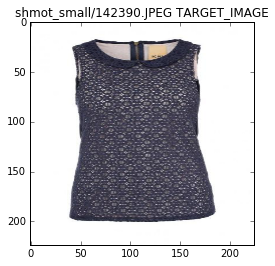

In [87]:
TARGET_IMAGE = "shmot_small/142390.JPEG"
draw_image(TARGET_IMAGE, "TARGET_IMAGE")

In [88]:
target_image = get_image("shmot_small/142390.JPEG")

In [89]:
target_image_code = get_intermediate_layer(target_image[None, :])

### Сравниваем промежуточные представления

In [100]:
dists = []
for im_path, im_code in zip(images_pathes, images_codes):
    dist = np.linalg.norm(target_image_code-im_code)
    dists.append((im_path, dist))
dists = sorted(dists, reverse = True, key = lambda x: x[1])

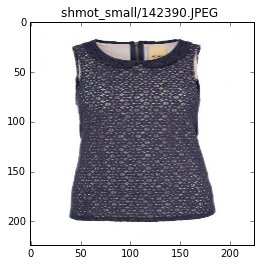

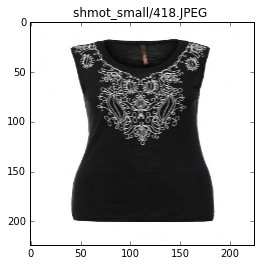

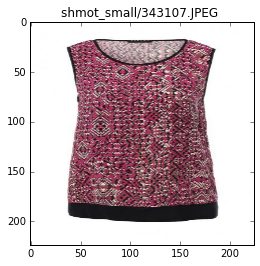

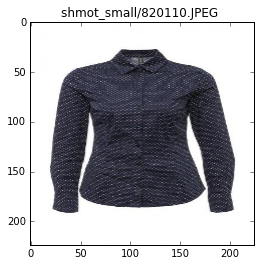

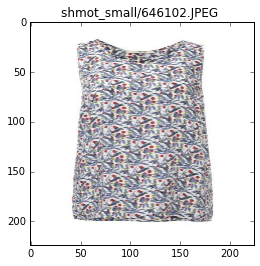

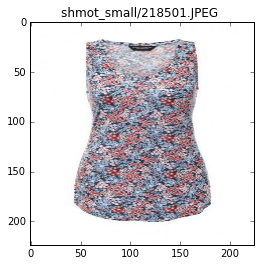

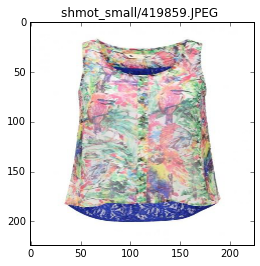

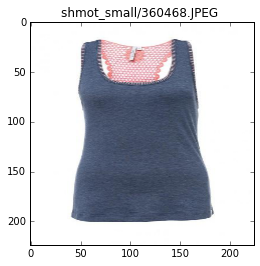

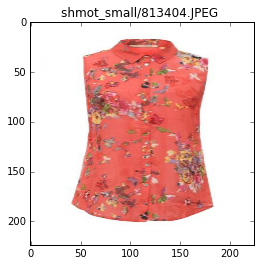

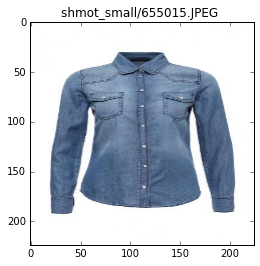

In [101]:
for im_path, im_code in inner_products[:10]:
    plt.figure()
    draw_image(im_path)